#AML Project

##Group 10

### Random Forest

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn import tree

from sklearn.metrics import accuracy_score, brier_score_loss
from sklearn.metrics import classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import ParameterGrid

from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import brier_score_loss
from sklearn.calibration import CalibratedClassifierCV
from sklearn.calibration import CalibrationDisplay

In [ ]:
x_train = pd.read_csv('Oversampled_X_train.csv')
x_train.head(10)

,wrong_fragment,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_file_creations,num_access_files,is_guest_login,...,service_vmnet,service_whois,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S1,flag_S2,flag_S3,flag_SH
0,-0.089692,-0.09505,-0.027644,0,-0.011106,0,-0.02447,-0.027178,-0.039638,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.089692,-0.09505,-0.027644,1,-0.011106,0,-0.02447,-0.027178,-0.039638,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.089692,0.37035,-0.027644,0,-0.011106,0,-0.02447,-0.027178,-0.039638,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.089692,-0.09505,-0.027644,1,-0.011106,0,-0.02447,-0.027178,-0.039638,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.089692,-0.09505,-0.027644,1,-0.011106,0,-0.02447,-0.027178,-0.039638,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,-0.089692,-0.09505,-0.027644,0,-0.011106,0,-0.02447,-0.027178,-0.039638,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,-0.089692,-0.09505,-0.027644,0,-0.011106,0,-0.02447,-0.027178,-0.039638,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,-0.089692,-0.09505,-0.027644,1,-0.011106,0,-0.02447,-0.027178,-0.039638,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,-0.089692,-0.09505,-0.027644,1,-0.011106,0,-0.02447,-0.027178,-0.039638,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,-0.089692,-0.09505,-0.027644,1,-0.011106,0,-0.02447,-0.027178,-0.039638,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_train = pd.read_csv('Oversampled_y_train.csv')
y_train.head(10)

,attack
0,Dos
1,normal
2,Probe
3,normal
4,normal
5,Dos
6,Dos
7,normal
8,normal
9,normal


In [ ]:
x_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

In [ ]:
x_val = pd.read_csv('X_val.csv')
y_val = pd.read_csv('y_val.csv')

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269365 entries, 0 to 269364
Data columns (total 100 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   wrong_fragment               269365 non-null  float64
 1   hot                          269365 non-null  float64
 2   num_failed_logins            269365 non-null  float64
 3   logged_in                    269365 non-null  int64  
 4   num_compromised              269365 non-null  float64
 5   root_shell                   269365 non-null  int64  
 6   su_attempted                 269365 non-null  float64
 7   num_file_creations           269365 non-null  float64
 8   num_access_files             269365 non-null  float64
 9   is_guest_login               269365 non-null  int64  
 10  diff_srv_rate                269365 non-null  float64
 11  srv_diff_host_rate           269365 non-null  float64
 12  dst_host_count               269365 non-null  float64
 13

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred_test = rf.predict(x_test)
y_pred_train = rf.predict(x_train)

accuracy_train = accuracy_score(y_train, y_pred_train)

accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'Accuracy of training data: {accuracy_train}')
print(f'Accuracy of testing data: {accuracy_test}')

Accuracy of training data: 1.0
Accuracy of testing data: 0.7657365922902897


In [ ]:
report_test=classification_report(y_test, y_pred_test)
print(report_test)

              precision    recall  f1-score   support

         Dos       0.97      0.81      0.88      7459
       Probe       0.85      0.68      0.75      2421
         R2L       0.80      0.03      0.07      2885
         U2R       0.59      0.28      0.38        67
      normal       0.66      0.97      0.79      9711

    accuracy                           0.77     22543
   macro avg       0.78      0.56      0.58     22543
weighted avg       0.80      0.77      0.72     22543



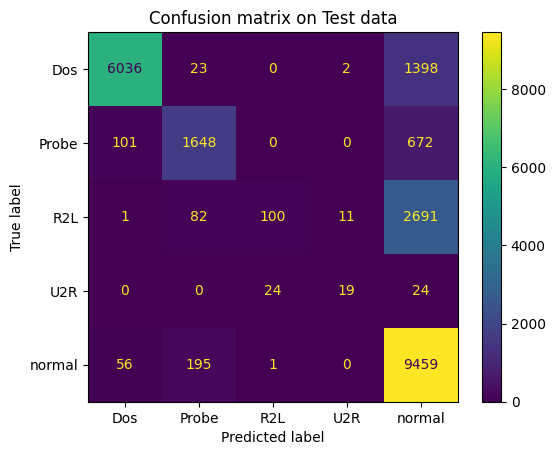

In [ ]:
cm = confusion_matrix(y_test, y_pred_test, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf.classes_)
disp.plot()
plt.title("Confusion matrix on Test data")
plt.show()

In [ ]:
n_estimators = [100, 150]
max_depth = [5, 7, 11]
oob_scores = []
train_scores = []
val_scores = []
for estimators in n_estimators:
  for features in max_depth:
    rf = RandomForestClassifier(n_estimators=estimators, max_depth=features, random_state=42, oob_score=True)
    rf.fit(x_train, y_train)
    train_scores.append(rf.score(x_train, y_train))
    val_scores.append(rf.score(x_val, y_val))
    oob_scores.append(rf.oob_score_)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklea

In [ ]:
best_index = val_scores.index(max(val_scores))
best_n_estimators = n_estimators[best_index//len(max_depth)]
best_max_depth = max_depth[best_index-(best_index//len(n_estimators))*len(max_depth)]
train_score = train_scores[best_index]
val_score = val_scores[best_index]

print(f"Random Forest best n_estimators: {best_n_estimators}")
print(f"Random Forest best max_depth: {best_max_depth}")
print(f"Random Forest best oob_score: {max(oob_scores)}")
print(f"Random Forest train_score: {train_score}")
print(f"Random Forest val_score: {val_score}")

Random Forest best n_estimators: 150
Random Forest best max_depth: 11
Random Forest best oob_score: 0.9989159690382937
Random Forest train_score: 0.9991238653871142
Random Forest val_score: 0.9981742409208176


In [ ]:
rf_final = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)
rf_final.fit(x_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(max_depth=11, n_estimators=150, random_state=42)

In [ ]:
y_pred_test = rf_final.predict(x_test)
y_pred_train = rf_final.predict(x_train)

accuracy_train = accuracy_score(y_train, y_pred_train)

accuracy_test = accuracy_score(y_test, y_pred_test)
print(f'Accuracy of training data: {accuracy_train}')
print(f'Accuracy of testing data: {accuracy_test}')

Accuracy of training data: 0.9991238653871142
Accuracy of testing data: 0.7843676529299561


In [ ]:
report_test=classification_report(y_test, y_pred_test)
print(report_test)

              precision    recall  f1-score   support

         Dos       0.97      0.79      0.87      7459
       Probe       0.83      0.72      0.77      2421
         R2L       0.94      0.20      0.34      2885
         U2R       0.36      0.37      0.37        67
      normal       0.69      0.97      0.81      9711

    accuracy                           0.78     22543
   macro avg       0.76      0.61      0.63     22543
weighted avg       0.83      0.78      0.76     22543



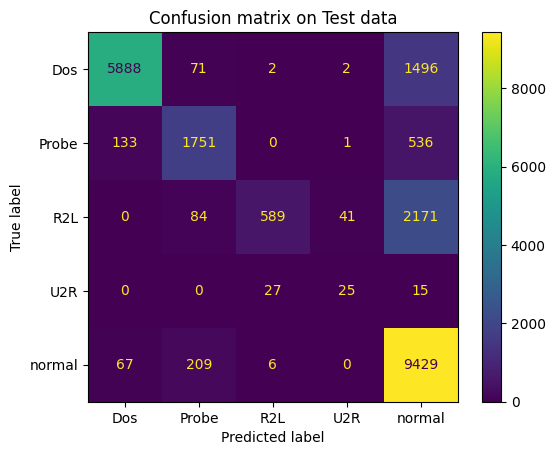

In [ ]:
cm = confusion_matrix(y_test, y_pred_test, labels=rf_final.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=rf_final.classes_)
disp.plot()
plt.title("Confusion matrix on Test data")
plt.show()

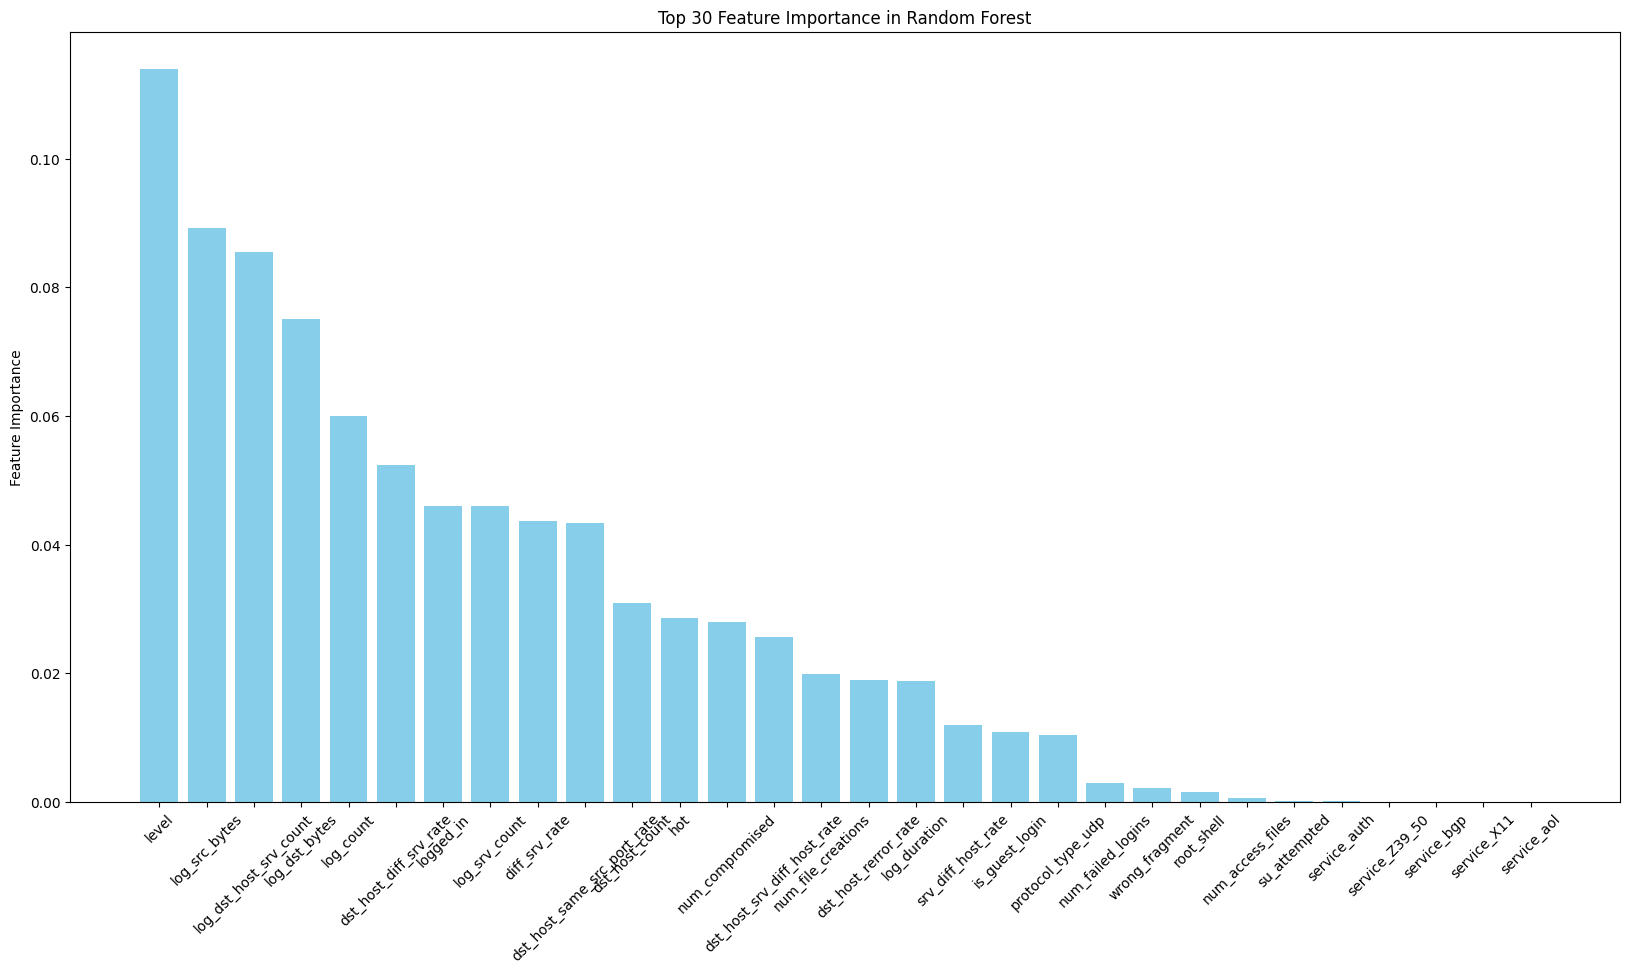

In [ ]:
importances = rf_final.feature_importances_

importance_df = pd.DataFrame({
    'Feature': rf_final.feature_names_in_[:30],
    'Importance': importances[:30]
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(20, 10))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue', align='center')
plt.xticks(importance_df['Feature'], rotation=45)
plt.ylabel("Feature Importance")
plt.title('Top 30 Feature Importance in Random Forest')
plt.show()